In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('spotify_cleaned_data.csv')


C:\Users\jaink\AppData\Local\Temp\ipykernel_23964\3093977974.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Outliers', y='Column', data=outlier_df, palette='viridis')


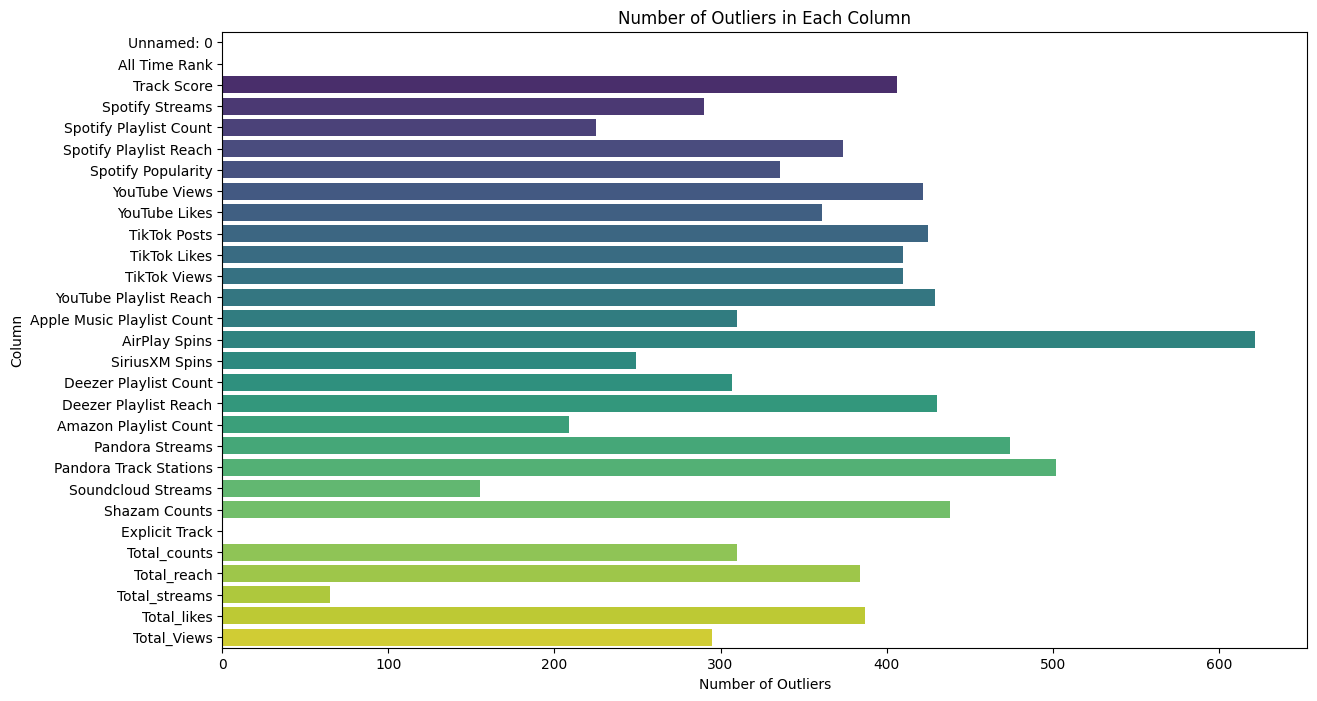

In [9]:
outlier_counts = {}

def count_outliers_iqr(series):
    if series.dropna().empty:
        return 0
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        outlier_count = count_outliers_iqr(df[column])
        outlier_counts[column] = outlier_count

outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Number of Outliers'])

plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Outliers', y='Column', data=outlier_df, palette='viridis')
plt.title('Number of Outliers in Each Column')
plt.xlabel('Number of Outliers')
plt.ylabel('Column')
plt.show()

In [10]:


integer_columns = df.select_dtypes(include=['int']).columns

def remove_outliers(df, col):
    mean = df[col].mean()
    std = df[col].std()
    df = df[(df[col] >= mean - 3 * std) & (df[col] <= mean + 3 * std)]
    return df

for col in integer_columns:
    df = remove_outliers(df, col)

df.to_csv('cleaned_data_no_outliers.csv', index=False)


In [11]:
df2 = pd.read_csv('cleaned_data_no_outliers.csv')


In [12]:
for column in df2.columns:
    unique_values = df2[column].unique()
    print(f"Column: {column}")
    print(f"Unique values ({len(unique_values)}):")
    print(unique_values)
    print("\n")

Column: Unnamed: 0
Unique values (4600):
[   0    1    2 ... 4597 4598 4599]


Column: Track
Unique values (4370):
['MILLION DOLLAR BABY' 'Not Like Us' 'i like the way you kiss me' ...
 'Grace (feat. 42 Dugg)' 'Nashe Si Chadh Gayi'
 'Me Acostumbre (feat. Bad Bunny)']


Column: Album Name
Unique values (4005):
['Million Dollar Baby - Single' 'Not Like Us' 'I like the way you kiss me'
 ... 'Dil Meri Na Sune (From "Genius")' 'November Top 10 Songs'
 'Me Acostumbre (feat. Bad Bunny)']


Column: Artist
Unique values (2000):
['Tommy Richman' 'Kendrick Lamar' 'Artemas' ... 'Kerim Araz'
 'Jaques Raupï¿' 'BUSHIDO ZHO']


Column: Release Date
Unique values (1562):
['2024-04-26' '2024-05-04' '2024-03-19' ... '2018-10-31' '2016-11-08'
 '2017-04-11']


Column: All Time Rank
Unique values (4577):
[1.000e+00 2.000e+00 3.000e+00 ... 4.571e+03 4.591e+03 4.593e+03]


Column: Track Score
Unique values (862):
[725.4 545.9 538.4 444.9 423.3 410.1 407.2 375.8 355.7 330.6 322.1 320.2
 316.3 308.2 301.6 299.9

In [13]:
for column in df2.columns:
    missing_count = df2[column].isna().sum()
    
    has_missing = missing_count > 0
    
    print(f"Column: {column}")
    print(f"Number of missing values: {missing_count}")
    print(f"Has missing values? {'Yes' if has_missing else 'No'}")
    print("-" * 40)

Column: Unnamed: 0
Number of missing values: 0
Has missing values? No
----------------------------------------
Column: Track
Number of missing values: 0
Has missing values? No
----------------------------------------
Column: Album Name
Number of missing values: 0
Has missing values? No
----------------------------------------
Column: Artist
Number of missing values: 5
Has missing values? Yes
----------------------------------------
Column: Release Date
Number of missing values: 0
Has missing values? No
----------------------------------------
Column: All Time Rank
Number of missing values: 0
Has missing values? No
----------------------------------------
Column: Track Score
Number of missing values: 0
Has missing values? No
----------------------------------------
Column: Spotify Streams
Number of missing values: 113
Has missing values? Yes
----------------------------------------
Column: Spotify Playlist Count
Number of missing values: 70
Has missing values? Yes
----------------------